In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0
...,...,...,...
7376,870,location 167,0
7377,18068,location 106,0
7378,14111,location 1086,2
7379,15189,location 7,0


In [4]:
train['location_id'] = train['location'].apply(lambda x: int(x.split('location ')[1]))

In [5]:
train

,id,location,fault_severity,location_id
0,14121,location 118,1,118
1,9320,location 91,0,91
2,14394,location 152,1,152
3,8218,location 931,1,931
4,14804,location 120,0,120
...,...,...,...,...
7376,870,location 167,0,167
7377,18068,location 106,0,106
7378,14111,location 1086,2,1086
7379,15189,location 7,0,7


In [6]:
test['location_id'] = test['location'].apply(lambda x: int(x.split('location ')[1]))

In [7]:
test

,id,location,location_id
0,11066,location 481,481
1,18000,location 962,962
2,16964,location 491,491
3,4795,location 532,532
4,3392,location 600,600
...,...,...,...
11166,14806,location 1073,1073
11167,1825,location 11,11
11168,2374,location 917,917
11169,7277,location 208,208


In [8]:
test['fault_severity'] = -1


In [9]:
test

,id,location,location_id,fault_severity
0,11066,location 481,481,-1
1,18000,location 962,962,-1
2,16964,location 491,491,-1
3,4795,location 532,532,-1
4,3392,location 600,600,-1
...,...,...,...,...
11166,14806,location 1073,1073,-1
11167,1825,location 11,11,-1
11168,2374,location 917,917,-1
11169,7277,location 208,208,-1


In [10]:
features = train.append(test)
features = features.drop('location', axis=1)
print(features.shape)
features.head()

(18552, 3)


,id,fault_severity,location_id
0,14121,1,118
1,9320,0,91
2,14394,1,152
3,8218,1,931
4,14804,0,120


In [11]:
severity_type = pd.read_csv('./data/severity_type.csv')
severity_type.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [12]:
severity_type.duplicated().sum()

0

In [13]:
severity_type.id.drop_duplicates

<bound method Series.drop_duplicates of 0        6597
1        8011
2        2597
3        5022
4        6852
         ... 
18547    3761
18548    8720
18549    6488
18550     878
18551    4464
Name: id, Length: 18552, dtype: int64>

In [14]:
severity_type_order = severity_type[['id']].drop_duplicates()
severity_type_order['order'] = 1. * np.arange(len(severity_type_order)) / len(severity_type_order)
severity_type_order.head()

,id,order
0,6597,0.000000
1,8011,0.000054
2,2597,0.000108
3,5022,0.000162
4,6852,0.000216


In [15]:
features = pd.merge(features, severity_type_order, how='inner', on='id')
print (features.shape)
features.head()

(18552, 4)


,id,fault_severity,location_id,order
0,14121,1,118,0.170009
1,9320,0,91,0.912947
2,14394,1,152,0.231458
3,8218,1,931,0.932514
4,14804,0,120,0.177285


In [16]:
features.count()[['id']]

id    18552
dtype: int64

In [17]:
# ---------------------------------------------------------------------------------
# location count
# ---------------------------------------------------------------------------------
location_count = features.groupby('location_id').count()[['id']]
location_count.columns = ['location_count']
location_count

,location_count
location_id,
1,69
2,22
3,4
4,9
5,1
...,...
1122,2
1123,1
1124,1


In [18]:
features = pd.merge(features, location_count, how='inner', left_on='location_id', right_index=True)
print(features.shape)
features.head()

(18552, 5)


,id,fault_severity,location_id,order,location_count
0,14121,1,118,0.170009,97
94,6821,0,118,0.171734,97
103,12008,0,118,0.171087,97
228,18441,0,118,0.169254,97
897,9479,0,118,0.171572,97


In [19]:
#check for other locations
features[features.location_id==110]

,id,fault_severity,location_id,order,location_count
2239,12568,0,110,0.134810,9
8748,4695,-1,110,0.134702,9
11972,15792,-1,110,0.135134,9
12249,15561,-1,110,0.134864,9
12665,7810,-1,110,0.134756,9
14304,5033,-1,110,0.134918,9
15875,17602,-1,110,0.134972,9
16201,8560,-1,110,0.135080,9
16468,17872,-1,110,0.135026,9


In [20]:
location_count[location_count['location_count'] > 40].index

Int64Index([   1,    7,    9,   12,   13,   91,   95,  102,  118,  122,
            ...
            1026, 1042, 1050, 1052, 1061, 1075, 1086, 1099, 1100, 1107], dtype='int64', name='location_id', length=120)

In [21]:
MIN_FREQ=20
frequent_locations = location_count[location_count['location_count'] > MIN_FREQ]
frequent_location_records = features[features['location_id'].isin(frequent_locations.index)].copy()
frequent_location_records['value'] = 1
location_features = frequent_location_records.pivot(index='id', columns='location_id', values='value')
location_features.columns = ['location_%i' % c for c in location_features.columns]
print ('location_features', location_features.shape)


location_features (13331, 247)


In [22]:
location_features

,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [23]:
features=pd.merge(features, location_features, how='left', left_on='id', right_index=True)
features = features.fillna(0)
features.shape

(18552, 252)

In [24]:
# ---------------------------------------------------------------------------------
# event type ['id', 'event_type']
# ---------------------------------------------------------------------------------
event_type = pd.read_csv('./data/event_type.csv')

print(event_type.head())

print(event_type.shape)

      id     event_type
0  18552  event_type 34
1  18552  event_type 35
2  18551  event_type 11
3  18550  event_type 11
4  18549  event_type 34
(34082, 2)


In [25]:
event_count = event_type.groupby('id').count()[['event_type']]
event_count.columns = ['event_type_count']
event_count.head()

,event_type_count
id,
1,2
2,2
3,1
4,1
5,2


In [26]:
features = pd.merge(features, event_count, how='inner', left_on='id', right_index=True)

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [32]:
event_type_count = event_type.groupby('event_type').count()[['id']].sort_values(by='id', ascending=False)
frequent_event_types = event_type_count[event_type_count['id'] > MIN_FREQ]
frequent_event_records = event_type[event_type['event_type'].isin(frequent_event_types.index)].copy()

frequent_event_records.head()

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34


In [33]:
event_features = pd.get_dummies(freqent_event_record)

In [34]:
event_features

,id,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,18552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18551,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34077,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34078,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34079,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34080,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
features = pd.merge(features, event_count, how='left', left_on='id', right_index=True)

In [36]:
features.shape

(18552, 253)

In [45]:
rare_event_types = event_type_count[event_type_count['id'] <= MIN_FREQ]
rare_event_records = event_type[event_type['event_type'].isin(rare_event_types.index)].copy()
rare_event_records['value'] = 1
rare_event_feature = rare_event_records.groupby('id').max()[['value']]
rare_event_feature.columns = ['rare_event_type']
rare_event_feature.head()

,rare_event_type
id,
72,1
78,1
128,1
215,1
283,1


In [42]:
pip install efficientnet

Note: you may need to restart the kernel to use updated packages.


In [47]:
features=features.rename(columns = {"id_x": "id"}) 
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [49]:
features = pd.merge(features, rare_event_feature, how='left', left_on='id',right_index=True)

In [50]:
event_type

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34
...,...,...
34077,3,event_type 11
34078,2,event_type 35
34079,2,event_type 34
34080,1,event_type 11


In [52]:
event_type['event_id'] = event_type.event_type.apply(lambda x: int(x.split('event_type ')[1]))
max_event_cat = event_type.groupby('id').max()[['event_id']] // 3
max_event_cat.columns = ['max_event_type_cat']
min_event_cat = event_type.groupby('id').min()[['event_id']] // 3
min_event_cat.columns = ['min_event_type_cat']
print(min_event_cat.head())
print(max_event_cat.head())

    min_event_type_cat
id                    
1                    3
2                   11
3                    3
4                   15
5                   11
    max_event_type_cat
id                    
1                    4
2                   11
3                    3
4                   15
5                   11


In [60]:
mean_event_cat = event_type.groupby('id').mean()[['event_id']] *4
mean_event_cat.columns = ['mean_id']


In [61]:
features = pd.merge(features, max_event_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_event_cat, how='left', left_on='id', right_index=True)
print( features.shape)
features.head()

(18552, 256)


,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,rare_event_type,max_event_type_cat,min_event_type_cat
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [62]:
features.isnull().sum().sum()

18421

In [66]:
features = features.fillna(0)
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,rare_event_type,max_event_type_cat,min_event_type_cat
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [67]:
log_feature_file = pd.read_csv( './data/log_feature.csv')
log_feature_count = log_feature_file.groupby('id').count()[['log_feature']]
log_feature_count.columns = ['log_feature_count']
log_feature_file.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [68]:
features = pd.merge(features, log_feature_count, how='inner', left_on='id', right_index=True)
print (features.shape)

(18552, 257)


In [69]:
log_feature_count = log_feature_file.groupby('log_feature').count()[['id']].sort_values(by='id', ascending=False)
frequent_log_features = log_feature_count[log_feature_count['id'] > MIN_FREQ]
frequent_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(frequent_log_features.index)].copy()

frequent_log_feature_records

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [70]:
log_feature = pd.get_dummies(frequent_log_feature_records)
log_feature

,id,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_feature 181,log_feature_feature 182,log_feature_feature 183,log_feature_feature 187,log_feature_feature 188,log_feature_feature 191,log_feature_feature 193,log_feature_feature 195,log_feature_feature 196,log_feature_feature 197,log_feature_feature 198,log_feature_feature 20,log_feature_feature 201,log_feature_feature 202,log_feature_feature 203,log_feature_feature 204,log_feature_feature 205,log_feature_feature 206,log_feature_feature 207,log_feature_feature 209,log_feature_feature 211,log_feature_feature 212,log_feature_feature 217,log_feature_feature 218,log_feature_feature 219,log_feature_feature 220,log_feature_feature 221,log_feature_feature 222,log_feature_feature 223,log_feature_feature 227,log_feature_feature 228,log_feature_feature 229,log_feature_feature 230,log_feature_feature 231,log_feature_feature 232,log_feature_feature 233,log_feature_feature 234,log_feature_feature 235,log_feature_feature 236,log_feature_feature 239,log_feature_feature 240,log_feature_feature 273,log_feature_feature 276,log_feature_feature 277,log_feature_feature 278,log_feature_feature 280,log_feature_feature 283,log_feature_feature 284,log_feature_feature 285,log_feature_feature 289,log_feature_feature 290,log_feature_feature 291,log_feature_feature 293,log_feature_feature 301,log_feature_feature 303,log_feature_feature 304,log_feature_feature 305,log_feature_feature 306,log_feature_feature 307,log_feature_feature 308,log_feature_feature 309,log_feature_feature 310,log_feature_feature 311,log_feature_feature 312,log_feature_feature 313,log_feature_feature 314,log_feature_feature 315,log_feature_feature 316,log_feature_feature 318,log_feature_feature 345,log_feature_feature 349,log_feature_feature 35,log_feature_feature 353,log_feature_feature 354,log_feature_feature 358,log_feature_feature 359,log_feature_feature 360,log_feature_feature 362,log_feature_feature 368,log_feature_feature 370,log_feature_feature 374,log_feature_feature 375,log_feature_feature 376,log_feature_feature 378,log_feature_feature 38,log_feature_feature 39,log_feature_feature 42,log_feature_feature 44,log_feature_feature 46,log_feature_feature 47,log_feature_feature 51,log_feature_feature 52,log_feature_feature 54,log_feature_feature 55,log_feature_feature 56,log_feature_feature 62,log_feature_feature 63,log_feature_feature 65,log_feature_feature 66,log_feature_feature 68,log_feature_feature 70,log_feature_feature 71,log_feature_feature 73,log_feature_feature 74,log_feature_feature 75,log_feature_feature 76,log_feature_feature 8,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,6597,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8011,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
features = pd.merge(features, log_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 406)


In [72]:
features = features.rename(columns={'id_x': 'id'})


In [75]:
rare_log_features = log_feature_count[log_feature_count['id'] <= MIN_FREQ]
rare_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(rare_log_features.index)].copy()
rare_log_feature_records['value'] = 1
rare_log_feature_feature = rare_log_feature_records.groupby('id').max()[['value']]
rare_log_feature_feature.columns = ['rare_log_feature']
rare_log_feature_feature.head()

,rare_log_feature
id,
50,1
72,1
78,1
89,1
105,1


In [76]:
rare_log_features = log_feature_count[log_feature_count['id'] <= MIN_FREQ]
rare_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(rare_log_features.index)].copy()
rare_log_feature_records['value'] = 1
rare_log_feature_feature = rare_log_feature_records.groupby('id').max()[['value']]
rare_log_feature_feature.columns = ['rare_log_feature']
rare_log_feature_feature.head()

,rare_log_feature
id,
50,1
72,1
78,1
89,1
105,1


In [77]:
features = pd.merge(features, rare_log_feature_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 407)


In [78]:
FEATURE_CAT=5
log_feature_file['log_feature_id'] = log_feature_file.log_feature.apply(lambda x: int(x.split('feature ')[1]))
log_feature_file.head()

,id,log_feature,volume,log_feature_id
0,6597,feature 68,6,68
1,8011,feature 68,7,68
2,2597,feature 68,1,68
3,5022,feature 172,2,172
4,5022,feature 56,1,56


In [79]:
log_feature_file[log_feature_file.id==1]

,id,log_feature,volume,log_feature_id
36197,1,feature 68,2,68
36198,1,feature 345,2,345
36199,1,feature 179,1,179


In [80]:
max_log_feature_cat = log_feature_file.groupby('id').max()[['log_feature_id']] // FEATURE_CAT
max_log_feature_cat.columns = ['max_log_feature_cat']
median_log_feature_cat = log_feature_file.groupby('id').median()[['log_feature_id']] // FEATURE_CAT
median_log_feature_cat.columns = ['median_log_feature_cat']
min_log_feature_cat = log_feature_file.groupby('id').min()[['log_feature_id']] // FEATURE_CAT
min_log_feature_cat.columns = ['min_log_feature_cat']

print('max_log_feature_cat')
print(max_log_feature_cat)
print('min_log_feature_cat')
print(min_log_feature_cat)
print('median_log_feature_cat')
print(median_log_feature_cat)
print()

max_log_feature_cat
       max_log_feature_cat
id                        
1                       69
2                       63
3                       34
4                       74
5                       62
...                    ...
18548                   63
18549                   62
18550                   39
18551                   39
18552                   62

[18552 rows x 1 columns]
min_log_feature_cat
       min_log_feature_cat
id                        
1                       13
2                       46
3                       34
4                       74
5                       46
...                    ...
18548                   46
18549                   26
18550                   14
18551                   14
18552                   46

[18552 rows x 1 columns]
median_log_feature_cat
       median_log_feature_cat
id                           
1                        35.0
2                        62.0
3                        34.0
4                        74.0
5  

In [81]:
features = pd.merge(features, max_log_feature_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, median_log_feature_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_log_feature_cat, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 410)


In [82]:
log_feature_file['log_feature_id_cat'] = log_feature_file['log_feature_id'] // FEATURE_CAT
log_feature_cat = log_feature_file.groupby(['id', 'log_feature_id_cat']).sum()['volume']
log_feature_cat = log_feature_cat.reset_index()
log_feature_cat_feature = log_feature_cat.pivot(index='id', columns='log_feature_id_cat', values='volume')
log_feature_cat_feature.columns = ['log_feature_cat_%i' % c for c in log_feature_cat_feature.columns]
log_feature_cat_feature.head()

,log_feature_cat_0,log_feature_cat_1,log_feature_cat_2,log_feature_cat_3,log_feature_cat_4,log_feature_cat_5,log_feature_cat_6,log_feature_cat_7,log_feature_cat_8,log_feature_cat_9,log_feature_cat_10,log_feature_cat_11,log_feature_cat_12,log_feature_cat_13,log_feature_cat_14,log_feature_cat_15,log_feature_cat_16,log_feature_cat_17,log_feature_cat_18,log_feature_cat_19,log_feature_cat_20,log_feature_cat_21,log_feature_cat_22,log_feature_cat_23,log_feature_cat_24,log_feature_cat_25,log_feature_cat_26,log_feature_cat_27,log_feature_cat_28,log_feature_cat_29,log_feature_cat_30,log_feature_cat_31,log_feature_cat_32,log_feature_cat_33,log_feature_cat_34,log_feature_cat_35,log_feature_cat_36,log_feature_cat_37,log_feature_cat_38,log_feature_cat_39,log_feature_cat_40,log_feature_cat_41,log_feature_cat_42,log_feature_cat_43,log_feature_cat_44,log_feature_cat_45,log_feature_cat_46,log_feature_cat_47,log_feature_cat_48,log_feature_cat_49,log_feature_cat_50,log_feature_cat_51,log_feature_cat_52,log_feature_cat_53,log_feature_cat_54,log_feature_cat_55,log_feature_cat_56,log_feature_cat_57,log_feature_cat_58,log_feature_cat_59,log_feature_cat_60,log_feature_cat_61,log_feature_cat_62,log_feature_cat_63,log_feature_cat_64,log_feature_cat_65,log_feature_cat_66,log_feature_cat_67,log_feature_cat_68,log_feature_cat_69,log_feature_cat_70,log_feature_cat_71,log_feature_cat_72,log_feature_cat_73,log_feature_cat_74,log_feature_cat_75,log_feature_cat_76,log_feature_cat_77
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
features = pd.merge(features, log_feature_cat_feature, how='left', left_on='id', right_index=True)
print ('log_feature_cat_feature', log_feature_cat_feature.shape)

log_feature_cat_feature (18552, 78)


In [86]:
log_feature_file.loc[log_feature_file['volume'] > 49, 'volume']


37       50
38       50
446      50
469      50
552      50
         ..
58435    50
58441    50
58442    50
58452    50
58472    50
Name: volume, Length: 2178, dtype: int64

In [84]:
log_feature_file.loc[log_feature_file['volume'] > 49, 'volume'] = 50
volume_counts = log_feature_file.groupby(['id', 'volume']).count()[['log_feature']].reset_index()
volume_features = volume_counts.pivot(index='id', columns='volume', values='log_feature')
volume_features.columns = ['volume_%i' % c for c in volume_features.columns]
print ('volume_features', volume_features.shape)
volume_features

volume_features (18552, 50)


,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,volume_21,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18549,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18550,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
volume_features[volume_features.index==1]

,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,volume_21,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
log_feature_file[log_feature_file.id==1]

,id,log_feature,volume,log_feature_id,log_feature_id_cat
36197,1,feature 68,2,68,13
36198,1,feature 345,2,345,69
36199,1,feature 179,1,179,35


In [89]:
# resource_type # columns >>> ['id', 'resource_type']
# ---------------------------------------------------------------------------------
resource_type = pd.read_csv('./data/resource_type.csv')
resource_type.head()

,id,resource_type
0,1,resource_type 8
1,1,resource_type 6
2,2,resource_type 2
3,3,resource_type 8
4,4,resource_type 2


In [90]:
resource_type['value'] = 1
resource_type_count = resource_type.groupby('id').count()[['value']]
resource_type_count.columns = ['resource_type_count']
features = pd.merge(features, resource_type_count, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 489)


In [ ]:
resor

In [91]:
resource_type_features = pd.get_dummies(resource_type)
resource_type_features.columns = [c.replace('resource_type_', '') for c in resource_type_features.columns]
resource_type_features.columns = [c.replace('resource_type', 'resource_type_') for c in resource_type_features.columns]
print ('resource_type_features', resource_type_features.shape)
resource_type_features.head()

resource_type_features (22877, 13)


,id,value,1,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,1,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,0,0,0,0,0,0,0


In [92]:
features = pd.merge(features, resource_type_features, how='left', left_on='id', right_index=True)
features.shape

(18552, 502)

In [93]:
severity_type = pd.read_csv('./data/severity_type.csv')
#severity_type['value'] = 1
severity_type_features = pd.get_dummies(severity_type)
severity_type_features.columns = [c.replace('severity_type_', '') for c in severity_type_features.columns]
severity_type_features.columns = [c.replace('severity_type', 'severity_type_') for c in severity_type_features.columns]
severity_type_features.head()


,id,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0


In [94]:
features = features.rename(columns={"id_x":"id"})
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,event_type_count,rare_event_type,max_event_type_cat,min_event_type_cat,log_feature_count,id_y,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feat

In [95]:
features = pd.merge(features, severity_type_features, how='left', left_on='id', right_index=True)
features.shape


(18552, 508)

In [97]:
features = features.rename(columns={'id_x':'id'})
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_fe

In [99]:
features.sort_values(by='order')

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_fe

In [100]:
LOCATION_CAT=4
features = features.fillna(0)
features['location_cat'] = features['location_id'] // LOCATION_CAT
features['location_cat2'] = (features['location_id'] + LOCATION_CAT//2) // LOCATION_CAT
features = features.sort_values(by='order')
feature_names = list(features.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
feature_names

['location_count',
 'location_1',
 'location_2',
 'location_7',
 'location_9',
 'location_12',
 'location_13',
 'location_16',
 'location_17',
 'location_89',
 'location_91',
 'location_95',
 'location_100',
 'location_102',
 'location_116',
 'location_118',
 'location_122',
 'location_124',
 'location_126',
 'location_128',
 'location_133',
 'location_135',
 'location_139',
 'location_145',
 'location_147',
 'location_149',
 'location_155',
 'location_157',
 'location_159',
 'location_161',
 'location_169',
 'location_181',
 'location_206',
 'location_208',
 'location_240',
 'location_242',
 'location_244',
 'location_255',
 'location_266',
 'location_268',
 'location_270',
 'location_282',
 'location_283',
 'location_288',
 'location_292',
 'location_298',
 'location_300',
 'location_311',
 'location_314',
 'location_318',
 'location_324',
 'location_325',
 'location_326',
 'location_344',
 'location_363',
 'location_373',
 'location_375',
 'location_378',
 'location_380',
 'location

In [101]:
features['location_rank_asc'] = features.groupby('location_id')[['order']].rank()
features['location_rank_desc'] = features.groupby('location_id')[['order']].rank(ascending=False)
features['location_rank_rel'] = 1. * features['location_rank_asc'] / features['location_count']
features['location_rank_rel'] = np.round(features['location_rank_rel'], 2)

In [102]:
features

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_feature 181,log_feature_feature 182,log_feature_feature 183,log_feature_feature 187,log_feature_featur

In [103]:
# export
# ---------------------------------------------------------------------------------

features.to_csv('final_feature.csv', index=False)
print ('final features', features.shape)

final features (18552, 513)


## Future selection

In [104]:
features = pd.read_csv('final_feature.csv')
train = features[features['fault_severity'] >= 0].copy()
print (train.shape)

(7381, 513)


In [105]:
feature_names = list(train.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
print (len(feature_names))

509


In [106]:
import xgboost as xgb

In [107]:
parameters = {'min_child_weight': 3, 'eta': 0.05, 'colsample_bytree': 0.4,'max_depth': 10, 'subsample': 0.9, 'lambda': 0.5, 'nthread': -1,
            'objective': 'multi:softprob', 'silent': 0, 'num_class': 3}
fs = ['f%i' % i for i in range(len(feature_names))]
dtrain = xgb.DMatrix(train[feature_names].values, label=train['fault_severity'].values,missing=-9999, feature_names=fs)
model = xgb.train(parameters, dtrain, 1000,)
print()
print('Model Trained...')

[09:51:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:51:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Model Trained...


In [108]:
feature_imp = model.get_fscore()
print(feature_imp)


{'f446': 2855, 'f405': 3205, 'f403': 3106, 'f506': 8185, 'f416': 1057, 'f505': 6875, 'f485': 12222, 'f254': 5487, 'f0': 8210, 'f253': 12228, 'f252': 2947, 'f419': 687, 'f248': 1381, 'f453': 122, 'f442': 170, 'f56': 1, 'f251': 1526, 'f113': 14, 'f451': 275, 'f445': 295, 'f348': 361, 'f490': 1356, 'f422': 2944, 'f228': 47, 'f211': 21, 'f496': 1515, 'f133': 20, 'f444': 445, 'f319': 307, 'f468': 1074, 'f507': 8274, 'f402': 259, 'f475': 79, 'f499': 1185, 'f484': 803, 'f467': 653, 'f439': 96, 'f208': 81, 'f384': 77, 'f440': 1647, 'f464': 499, 'f163': 35, 'f245': 13, 'f418': 95, 'f414': 65, 'f320': 177, 'f299': 241, 'f498': 13131, 'f508': 9531, 'f243': 34, 'f420': 857, 'f504': 8893, 'f423': 162, 'f502': 109, 'f417': 477, 'f250': 1956, 'f449': 214, 'f349': 173, 'f452': 904, 'f184': 73, 'f185': 8, 'f141': 64, 'f164': 46, 'f377': 129, 'f338': 83, 'f404': 4585, 'f478': 63, 'f3': 9, 'f106': 6, 'f44': 16, 'f309': 67, 'f462': 334, 'f447': 318, 'f434': 3, 'f249': 67, 'f281': 80, 'f322': 180, 'f124': 

In [109]:
f1 = pd.DataFrame(list(feature_imp.items()), columns=['f', 'imp'])
f1.head()

,f,imp
0,f446,2855
1,f405,3205
2,f403,3106
3,f506,8185
4,f416,1057


In [110]:
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
f2.head()

,f,feature_name
0,f0,location_count
1,f1,location_1
2,f2,location_2
3,f3,location_7
4,f4,location_9


In [111]:
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance.head()

,f,imp,feature_name
0,f0,8210.0,location_count
1,f1,1.0,location_1
2,f2,NaN,location_2
3,f3,9.0,location_7
4,f4,2.0,location_9


In [112]:
feature_importance.shape

(509, 3)

In [113]:
feature_importance.to_csv('feature_imp.csv', index=False)

In [114]:
feature_importance = pd.read_csv('feature_imp.csv')
feature_importance.isnull().sum().sum()

265

In [119]:
feature_importance = feature_importance.fillna(0)

drop_cols = list(feature_importance[feature_importance['imp'] < 1]['feature_name'])
print ('drop cols', len(drop_cols))

drop cols 265


In [121]:
train = features[features['fault_severity'] >= 0].copy()
test = features[features['fault_severity'] < 0].copy()
train.shape, test.shape

((7381, 513), (11171, 513))

In [122]:
feature_names = list(train.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
feature_names = list(set(feature_names) - set(drop_cols))
print ('features :', len(feature_names))

features : 244


In [123]:
train.fault_severity.unique()

array([0, 2, 1])

In [124]:
train.fault_severity.value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
from imblearn.under_sampling import RandomUnderSampler

In [127]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')



In [128]:
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.1,random_state=10)
    
    print('Training Dataset Shape :',x_train.shape)
    print('Test Dataset Shape :',x_test.shape)
    print('Training Label Shape: ',y_train.shape)
    print('Test Label Shape: ',y_test.shape)
    print()
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    print('Training Started...')
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    print()
    print('Predicting on Test Set...')
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   
    print(pred)
    print()
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)
    
    print()
    
    
    plot_confusion_matrix(cm, ['0', '1', '2'])

Training Dataset Shape : (6642, 244)
Test Dataset Shape : (739, 244)
Training Label Shape:  (6642,)
Test Label Shape:  (739,)

Training Started...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 33.0min finished
/Users/SN/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Predicting on Test Set...
[0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 1 0 0 0 0 1 0 1 2 0 0 2 0 0 2 1 1 1 0 1 0
 1 1 0 1 0 2 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 2 1 0 0 0 0 2 1 1 0 0 1 0 0
 1 2 0 0 0 1 2 1 0 0 0 0 0 1 2 0 1 1 0 0 1 0 0 1 0 0 1 0 0 2 0 2 0 0 0 1 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 2 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 2 0 0 0 2 1 0
 1 0 1 0 0 0 0 0 1 0 2 1 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 2 0 2 0 2 2 1 1 1 2 0 2 0 0 1 0 1 0 1 0 2 0 0 0 0 0 0
 1 1 2 1 0 0 2 2 0 0 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1
 0 0 0 1 0 2 0 1 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 2 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 

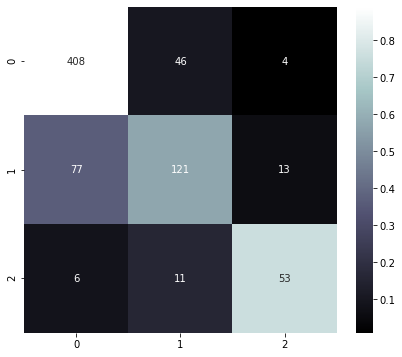

In [129]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
            'max_depth' : [2,4,6,8,10]
           
        }
FitModel(train[feature_names],train.fault_severity,'XGBoost',xgb.XGBClassifier(n_jobs=-1,objective='softprob'),param,cv=5)

In [130]:
from imblearn.over_sampling import SMOTE

In [134]:
pip install --upgrade scikit-learn==0.23.2

     |████████████████████████████████| 7.2 MB 8.0 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.0 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
